In [1]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
import mmcv

In [2]:
config_file = '../configs/deepscoresv2/s2anet_r50_fpn_1x_deepscoresv2_tugg_lowrez.py'
# config_file = '../configs/deepscoresv2/s2anet_r50_fpn_1x_deepscoresv2.py'
# download the checkpoint from model zoo and put it in `checkpoints/`
checkpoint_file = '../work_dirs/s2anet_r50_fpn_1x_deepscoresv2_tugg_lowrez/epoch_500.pth'
# checkpoint_file = '../work_dirs/s2anet_r50_fpn_1x_deepscoresv2/latest.pth'

In [4]:
# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file, device='cuda:0')

In [3]:
# Get dota
from mmdet.datasets.dota import DotaDataset
dataset = DotaDataset(
    ann_file='../data/dota_1024/trainval_split/trainval_s2anet.pkl',
    pipeline=[
        {'type': 'LoadImageFromFile'},
        {'type': 'LoadAnnotations', 'with_bbox': True},
        {'type': 'RotatedResize', 'img_scale': (1024, 1024), 'keep_ratio': True},
        {'type': 'RotatedRandomFlip', 'flip_ratio': 0.5},
        {'type': 'Normalize',
         'mean': [240.15232515949037, 240.15229097456378, 240.15232515949037],
         'std': [57.178083212078896, 57.178143244444556, 57.178083212078896], 'to_rgb': False},
        {'type': 'Pad', 'size_divisor': 32},
        {'type': 'DefaultFormatBundle'},
        {'type': 'Collect', 'keys': ['img', 'gt_bboxes', 'gt_labels']}
    ],
    img_prefix='../data/dota_1024/trainval_split/images/'
)

In [ ]:
# test a single image
img = '../data/dota_1024/trainval_split/images/P2605__1.0__0___1204.png'
result = inference_detector(model, img)

In [ ]:
# Get deepscores
from mmdet.datasets.deepscoresv2 import DeepScoresV2Dataset
dataset = DeepScoresV2Dataset(
    ann_file='../data/deep_scores_dense/deepscores_train.json',
    pipeline=[
        {'type': 'LoadImageFromFile'},
        {'type': 'LoadAnnotations', 'with_bbox': True},
        {'type': 'RotatedResize', 'img_scale': (1024, 1024), 'keep_ratio': True},
        {'type': 'RotatedRandomFlip', 'flip_ratio': 0.5},
        {'type': 'Normalize',
         'mean': [240.15232515949037, 240.15229097456378, 240.15232515949037],
         'std': [57.178083212078896, 57.178143244444556, 57.178083212078896], 'to_rgb': False},
        {'type': 'Pad', 'size_divisor': 32},
        {'type': 'DefaultFormatBundle'},
        {'type': 'Collect', 'keys': ['img', 'gt_bboxes', 'gt_labels']}
    ],
    img_prefix='../data/deep_scores_dense/images/'
)

In [21]:
# Load sample
sample = dataset[0]
path = sample['img_meta'].data['filename']
print(path)
# img = sample['img'].data.numpy()
img = path
result = [sample['gt_bboxes'].data]
print(result[0].shape)
print(result)

../data/dota_1024/trainval_split/images/P0868__1.0__0___1314.png
torch.Size([7, 5])
[tensor([[ 6.3600e+02,  1.0900e+02,  2.1608e+02,  2.6000e+01,  1.6030e+00],
        [ 6.6350e+02,  3.9500e+02,  3.6319e+02,  2.6476e+01,  1.4173e+00],
        [ 6.2000e+01,  4.9550e+02,  1.2376e+02,  3.7879e+01, -8.3394e-02],
        [ 4.0543e+01,  3.8500e+02,  8.1195e+01,  3.6953e+01, -5.1809e-02],
        [ 6.2000e+02,  3.5200e+02,  8.8414e+01,  3.0806e+01,  7.4666e-01],
        [ 6.1000e+02,  2.0750e+02,  7.0178e+01,  2.5179e+01,  1.6287e+00],
        [ 6.0950e+02,  1.0650e+02,  7.6164e+01,  3.0150e+01,  1.6234e+00]],
       dtype=torch.float64)]


/home/ubuntu/realscore-embe/s2anet/mmdet/datasets/pipelines/loading.py:65: UserWarning: Skip the image "../data/dota_1024/trainval_split/images/P1640__1.0__0___824.png" that has no valid gt bbox
  file_path))
/home/ubuntu/realscore-embe/s2anet/mmdet/datasets/pipelines/loading.py:65: UserWarning: Skip the image "../data/dota_1024/trainval_split/images/P0032__1.0__0___0.png" that has no valid gt bbox
  file_path))


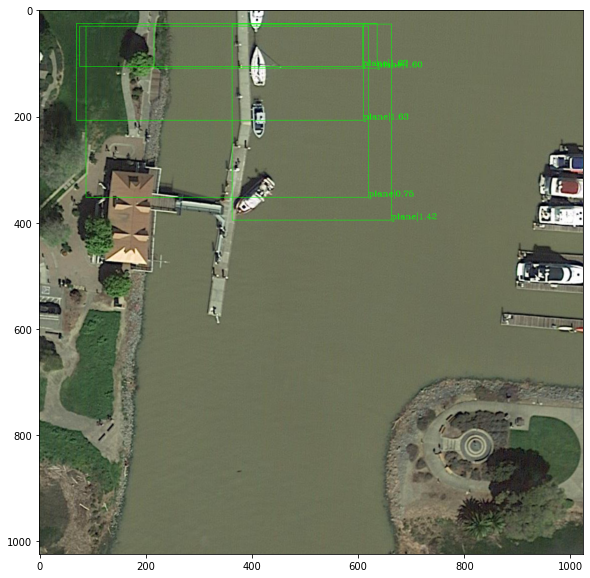

In [22]:
# show the results
show_result_pyplot(img, result, model.CLASSES)

In [23]:
res = inference_detector(model, img)
for i, r in enumerate(res):
    print("="*10 + f" {i} ({len(r)})" + "="*10)
    print(r)

========== 0 (0)==========
[]
========== 1 (0)==========
[]
========== 2 (1)==========
[[ 4.0343359e+02  3.5105893e+02  8.6967957e+01  2.9751705e+01
  -7.3309129e-01  5.4351263e-02]]
========== 3 (0)==========
[]
========== 4 (3)==========
[[ 2.0463634e+01  5.6521729e+02  4.1799198e+01  1.8455845e+01
   1.3271260e-01  7.2537325e-02]
 [ 9.8387360e+02  3.3367636e+02  7.0879333e+01  3.3573936e+01
   6.3783526e-02  5.7229564e-02]
 [ 8.7819775e+02  8.5272662e+02  3.7571907e+01  1.8800539e+01
  -9.9903584e-02  5.0895423e-02]]
========== 5 (3)==========
[[ 4.0343359e+02  3.5105893e+02  8.6967957e+01  2.9751705e+01
  -7.3309129e-01  7.5365767e-02]
 [ 9.4512103e+02  5.8906665e+02  1.5233060e+02  2.0913784e+01
   1.9149536e-01  6.3971944e-02]
 [ 9.8387360e+02  3.3367636e+02  7.0879333e+01  3.3573936e+01
   6.3783526e-02  6.0749944e-02]]
========== 6 (11)==========
[[ 4.12671082e+02  1.08985016e+02  7.40352707e+01  3.40425911e+01
   1.47810292e+00  9.34862614e-01]
 [ 4.13579834e+02  2.07675705e+0

In [14]:
# test a single image
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# source = Path('..', 'scorectify_out')
# out = Path('..', 'out')
source = Path('..', 'warped')
out = Path('..', 'warped_out')
for sample in source.glob('*.png'):
    print(f"Inferring {sample.name}")
    result = inference_detector(model, str(sample))
    if hasattr(model, 'module'):
        model = model.module
    img = mmcv.bgr2rgb(model.show_result(str(sample), result, score_thr=0.3, show=False))
    plt.figure(figsize=(15, 10))
    plt.imshow(img)
    plt.show()
    Image.fromarray(np.uint8(img)).save(out / Path(sample.name))

Inferring IMSLP399499_5_new.png
<class 'tuple'>
2
135
(0, 6)
1


TypeError: string indices must be integers